In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [3]:
dataset.shape

(100, 2)

In [4]:
X = dataset.iloc[:,:].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [5]:
X[:,1] #점수

array([ 73.,  55.,  55.,  89.,  79.,  26.,  15.,  62.,  59.,  74.,  78.,
        46.,   5.,  38.,  49.,  66.,  29.,  74.,  34.,  71.,   9.,  67.,
        43.,   0.,  90.,  77.,  47.,  50.,  38.,  23.,  31.,   2.,  20.,
        80.,  70.,  75.,  26.,  74.,  78.,  76.,  42.,  25.,  85.,  47.,
        36.,  69.,  22.,  74.,  23.,  35.,  94.,  75.,  16.,  27.,  62.,
        83.,  61.,  96.,  51.,  29.,  20.,  89.,  76.,  82.,  76.,  27.,
        15.,  80.,  22.,  78.,  52.,  75.,  74.,  75.,  39.,  43.,  57.,
        59.,  91., 100.,  19.,  80.,  25.,  38.,  79.,  77.,  30.,  14.,
        79.,  52.,  68.,  37.,  78.,  86.,  24.,  56.,  84.,  87.,  13.,
        30.])

In [6]:
X[:,0] #시간

array([ 7.33,  3.71,  3.43,  3.06,  3.33,  7.22,  8.12,  5.74,  8.73,
        4.73,  5.  ,  2.63,  7.02,  3.45,  3.06,  4.13,  9.17,  7.61,
        0.94,  3.67,  8.47,  2.86,  1.9 ,  6.08,  8.42,  6.12,  0.  ,
        2.16,  2.24,  2.31,  8.03,  9.02,  2.43,  4.5 ,  8.66,  7.95,
        2.03,  5.43,  4.44,  3.17,  1.53,  7.85,  7.42,  2.14,  2.02,
        9.43,  7.94,  1.83,  7.6 ,  6.41,  7.21,  2.53,  7.75,  8.08,
        4.61,  4.04,  4.25,  2.44,  2.06,  7.94,  6.96,  8.34,  8.5 ,
        6.91,  7.26,  8.11,  8.94,  4.71,  8.08,  7.76,  1.05,  8.58,
        7.83,  7.85,  2.28,  2.56,  2.35,  2.22,  4.29,  9.5 ,  7.81,
        8.33,  8.07,  8.06,  7.61,  3.24,  2.33,  8.97,  8.89,  1.83,
        2.13,  8.03,  5.8 , 10.  ,  2.41,  6.21,  7.76,  5.22,  6.65,
        2.46])

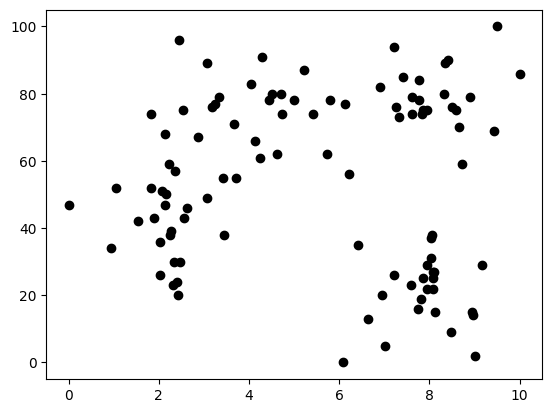

In [7]:
plt.scatter(X[:, 0], X[:, 1], color= 'black')
plt.show()

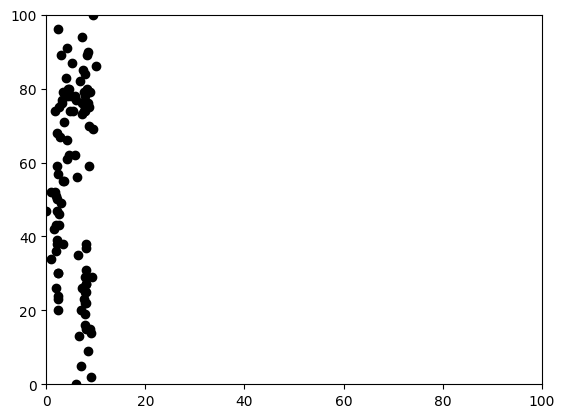

In [8]:
plt.scatter(X[:, 0], X[:, 1], color= 'black')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

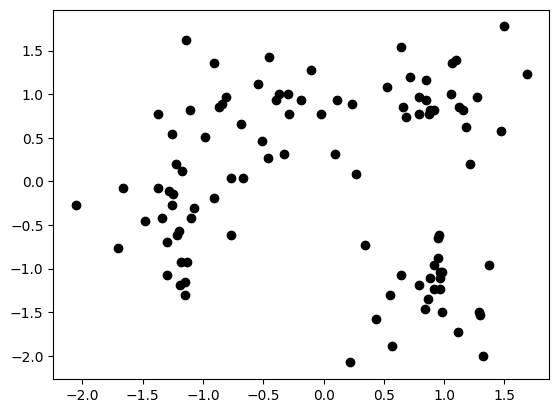

In [10]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], color= 'black')
plt.show()

In [11]:
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    
    kmeans.fit(X_trans)

    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

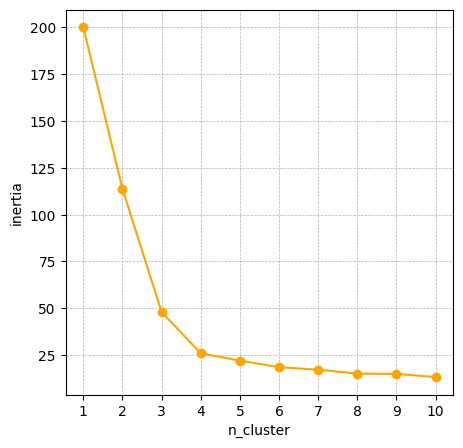

In [12]:
inertia_list = [] #각 점들에서 중심점까지의 거리 제곱의 합
for i in range(1, 11, 1):
    kmeans, X, X_trans, centers_org = model_kmeans(i)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

import matplotlib.pyplot as plt
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5,5))
plt.plot(x, y, marker='o', color='orange')
plt.xticks([x for x in range(1, 11, 1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [13]:
from sklearn.cluster import KMeans

inertia_list = [] #각 점들에서 중심점까지의 거리 제곱의 합
for i in range(1, 11, 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

In [14]:
x = list(range(1, 11, 1))
x 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

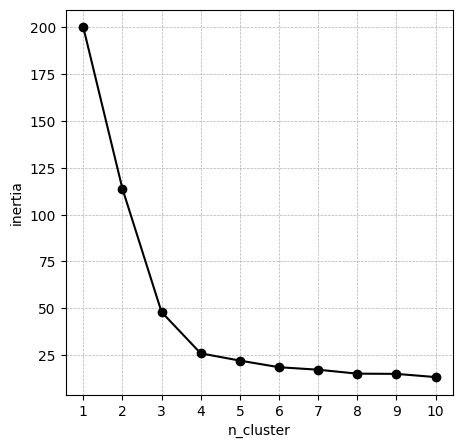

In [15]:
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5,5))
plt.plot(x, y, marker='o', color='black')
plt.xticks([x for x in range(1, 11, 1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [16]:
K=4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [17]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [18]:
dataset['cluster'] = y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [19]:
import numpy as np
index = np.where(y_pred==0)
index

(array([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55,
        56, 57, 67, 78, 85, 90, 92, 95, 97]),)

In [20]:
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


In [21]:
X[:5], X[index, 0], X[index, 1] #공부시간, 점수

(array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]),
 array([[3.71, 3.06, 3.33, 5.74, 4.73, 5.  , 4.13, 3.67, 2.86, 4.5 , 5.43,
         4.44, 3.17, 1.83, 2.53, 4.61, 4.04, 4.25, 2.44, 4.71, 4.29, 3.24,
         2.13, 5.8 , 6.21, 5.22]]),
 array([[55., 89., 79., 62., 74., 78., 66., 71., 67., 80., 74., 78., 76.,
         74., 75., 62., 83., 61., 96., 80., 91., 77., 68., 78., 56., 87.]]))

In [22]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

In [23]:
filt = dataset['cluster']==0
dataset[filt].index

Index([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55, 56,
       57, 67, 78, 85, 90, 92, 95, 97],
      dtype='int64')

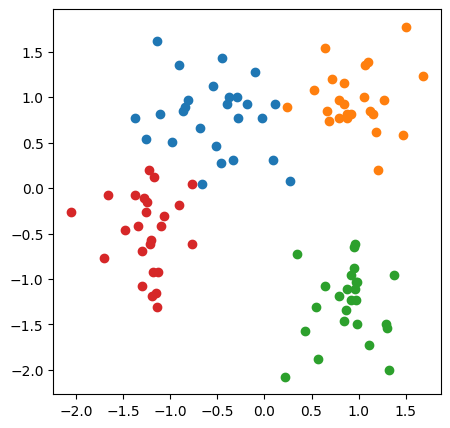

In [24]:
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x= X_trans[index, 0]
    y= X_trans[index, 1]
    plt.scatter(x, y)
plt.show()

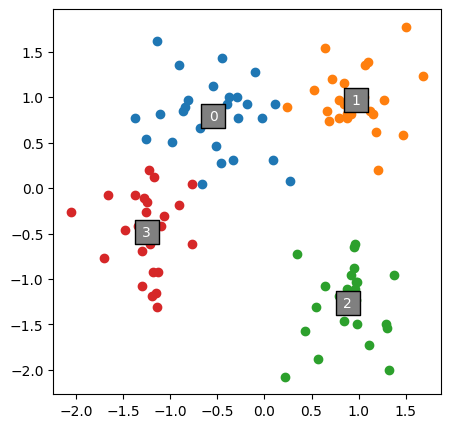

In [25]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x= X_trans[index, 0]
    y= X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy = centers[i, 1]
    plt.scatter(cx, cy, color='gray', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center', color='white')
plt.show()

In [26]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [27]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

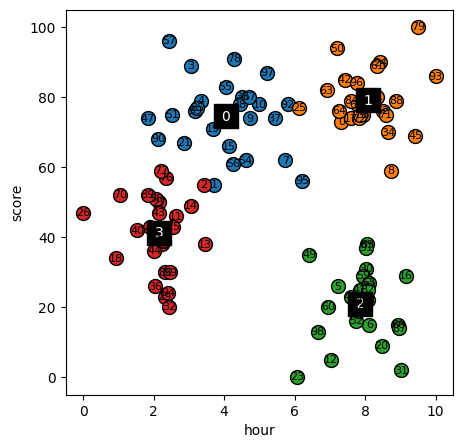

In [28]:
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, color='black', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center', color='white')

plt.xlabel('hour') 
plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='black', size=8)
plt.show()

In [29]:
dataset.loc[57, :]

hour        2.44
score      96.00
cluster     0.00
Name: 57, dtype: float64

In [30]:
dataset.loc[31, :]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [31]:
#KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    
    kmeans.fit(X_trans)

    Centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return kmeans, X, X_trans, centers_org


In [32]:
kmeans, X_org, X_trans ,centers_org = model_kmeans(5)
y_pred = kmeans.fit_predict(X_trans)
y_pred

array([1, 4, 3, 4, 4, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 4, 2, 4,
       3, 2, 1, 0, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 4, 3, 2, 1, 3,
       3, 1, 2, 4, 2, 2, 1, 4, 2, 2, 0, 0, 0, 4, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 4, 0, 1, 2, 1, 2, 2, 1, 4, 3, 2,
       1, 3, 4, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

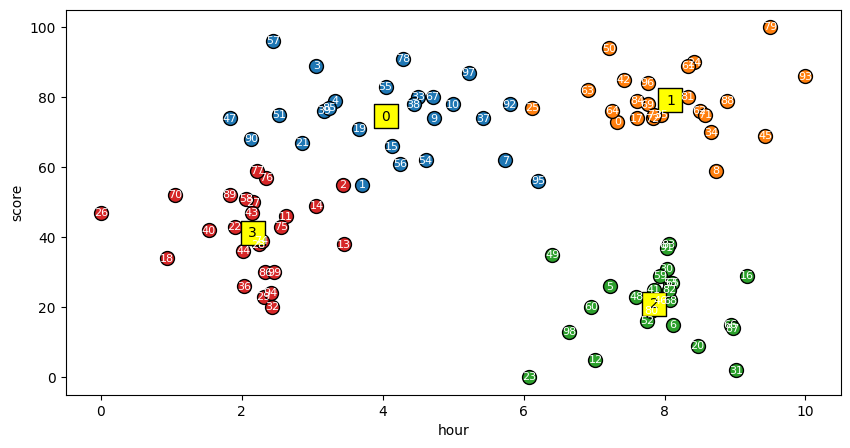

In [33]:
K=4
model, X_org, X_trans, centers_org = model_kmeans(K)
y_pred = model.fit_predict(X_trans)

plt.figure(figsize=(10,5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, color='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center', color='black')

plt.xlabel('hour') 
plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=8)
plt.show()

In [34]:
df_stu = pd.read_csv('data/학사관리/학생.csv')
df_stu.head()

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509


In [35]:
df_pro = pd.read_csv('data/학사관리/교수.csv')
df_pro.head()

,교수번호,교수이름,교수학과,임용일,교수직급,급여
0,221,이병렬,전산,75/04/03,정교수,3000000
1,228,이재광,전산,91/09/19,부교수,2500000
2,311,강승일,전자,94/06/09,부교수,2300000
3,509,오문환,건축,92/10/14,조교수,2000000


In [36]:
stu = list(df_stu['학생이름'])
stu

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정']

In [37]:
pro = list(df_pro['교수이름'])
pro

['이병렬', '이재광', '강승일', '오문환']

In [38]:
names = stu + pro
len(names)

12

In [39]:
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '이병렬', '이재광', '강승일', '오문환']


In [40]:
df = pd.read_csv('data/KMeansData.csv')
df['name']=''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [41]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(0, '서연우')

In [42]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name']= names[idx]
df.tail()

,hour,score,name
95,6.21,56,이원구
96,7.76,84,이원구
97,5.22,87,이지행
98,6.65,13,서연우
99,2.46,30,이병렬


In [43]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

,hour,score,name,cluster
95,6.21,56,이원구,0
96,7.76,84,이원구,1
97,5.22,87,이지행,0
98,6.65,13,서연우,2
99,2.46,30,이병렬,3


In [44]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명.....................')
    index = df2.index

    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, "name"]}', end='')
        count +=1
        if count%10==0: print()
    print()
    print('-' * 100)

0그룹 26명.....................
1:김창덕3:이재광4:김수정7:이지행9:강승일10:김수정15:강승일19:서연우21:김창덕33:김창덕
37:김형명38:김수정39:이재광47:이재영51:오문환54:박혜경55:강승일56:이재광57:김수정67:박혜경
78:김수정85:이병렬90:이원구92:서연우95:이원구97:이지행
----------------------------------------------------------------------------------------------------
1그룹 24명.....................
0:이재영8:이원구17:서연우24:강승일25:김수정34:이원구35:이병렬42:박혜경45:이병렬50:박혜경
61:이병렬62:서연우63:서연우64:이병렬69:이재광71:김형명72:박혜경73:김창덕79:이재광81:서연우
84:이재영88:이재영93:김수정96:이원구
----------------------------------------------------------------------------------------------------
2그룹 25명.....................
5:오문환6:이재광12:김창덕16:이원구20:이원구23:김창덕30:오문환31:김수정41:이지행46:김수정
48:이원구49:이지행52:박혜경53:오문환59:오문환60:서연우65:이지행66:이재광68:이재광80:김형명
82:김수정83:김창덕87:김수정91:이재영98:서연우
----------------------------------------------------------------------------------------------------
3그룹 25명.....................
2:이재광11:이병렬13:김형명14:서연우18:이원구22:이재영26:서연우27:김수정28:오문환29:이지행
32:김창덕36:이재영40:김형명43:이재영44:강승일58:이재광70:강승일74:김수정75:김형명76:강승일
77:김수정86:이